In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [12]:
colors = 'black white'.split()
cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)

# Section 1: A 2x2 World

## 1. Forward and Backward Slash

### 1.1. Forward slash

In [ ]:
forward_slash = [[0,1],[1,0]]
forward_slash = np.array(forward_slash)
print(forward_slash)

plt.imshow(forward_slash,cmap=cmap);
plt.show()

### 1.2. Backward slash

In [ ]:
backward_slash = [[1,0],[0,1]]
backward_slash = np.array(backward_slash)
print(backward_slash)

plt.imshow(backward_slash,cmap=cmap);
plt.show()

## 2. How computer sees it ?

### 2.1. Forward Slash

In [ ]:
serialized_forward_slash = forward_slash.ravel()
print(serialized_forward_slash)

plt.imshow(np.expand_dims(serialized_forward_slash, axis=0),cmap=cmap );
plt.show()

### 2.2. Backward Slash

In [ ]:
serialized_backward_slash = backward_slash.ravel()
print(serialized_backward_slash)

plt.imshow(np.expand_dims(serialized_backward_slash, axis=0),cmap=cmap);
plt.show()

## 3. Classify Forward and Backward Slash

In [ ]:
def predict(image):
  rule = [ 1,-1,-1,1]
  
  processed_pixels = []
  for (i, pixel) in enumerate(image):
    processed_pixels.append(rule[i] * pixel)
  
  total = sum(processed_pixels)

  if total > 0:
    print("Prediciton: Backward Slash")    
  else:
    print("Predicition: Forward Slash")

  return total


In [ ]:
images = [serialized_backward_slash,serialized_forward_slash]
for image in images:
  pred = predict(image)
  print(pred)

## 4. Generalization

In [ ]:
one = [[1,1],[0,1]]
one = np.array(one)

plt.imshow(one,cmap=cmap);
plt.show()

In [ ]:
predict(one.ravel())

In [ ]:
two = [[0,0],[1,0]]
two = np.array(two)
print(two)

plt.imshow(two,cmap=cmap);
plt.show()

In [ ]:
predict(two.ravel())

# Section 2: A 3x3 World

## 1 . Ex's & Oh's

## 1.1. Generating Images

In [2]:
POS = 1
NEG = -1

In [15]:
forward_slash = np.array([[NEG,NEG,POS],[NEG,POS,NEG],[POS,NEG,NEG]])
backward_slash = np.array([[POS,NEG,NEG],[NEG,POS,NEG],[NEG,NEG,POS]])


x = np.array([[POS,NEG,POS],[NEG,POS,NEG],[POS,NEG,POS]])
o = np.array([[NEG,POS,NEG],[POS,NEG,POS],[NEG,POS,NEG]])

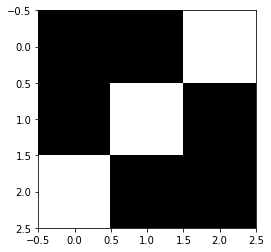

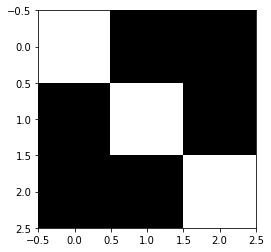

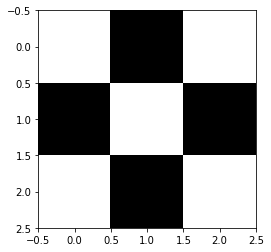

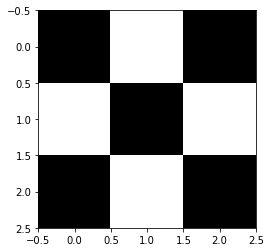

In [16]:
images = [forward_slash,backward_slash,x,o]
for image in images:
  plt.imshow(image,cmap=cmap);
  plt.show()

## 1.2. Defining convulation filter
We break images into smaller images and analyse them

In [10]:
backward_slash_filter = [1,-1,-1,1]
forward_slash_filter = [-1,1,1,-1]

In [5]:
# first number: row or column index
# second number: axis (0 for row 1 for column)
filter_movement = [
                    ((2,1),(2,0)),
                    ((0,1),(2,0)),
                    ((0,0),(2,1)),
                    ((0,0),(0,1))
                  ]

In [6]:
def convulation_layer(layer_filter,image):
  filtered_image = []
  for movement in filter_movement:
    x_movement = movement[0]
    y_movement = movement[1]
    
    filtered_block  = np.delete(image, x_movement[0], axis=x_movement[1])
    filtered_block = np.delete(filtered_block,y_movement[0],y_movement[1])
    
    processed_pixels = []

    for (i, pixel) in enumerate(filtered_block.ravel()):
      processed_pixels.append(layer_filter[i] * pixel)

    total = sum(processed_pixels)
    filtered_image.append(total)

  filtered_image = np.array(filtered_image)
  return filtered_image

### 1.3. Simplifying 3x3 into 2x2 


#### 1.3.1 Simplifying 'x' (Forward Filter)

In [ ]:
convulation_layer(forward_slash_filter,x)

In [ ]:
plt.imshow(convulation_layer(forward_slash_filter,x).reshape(2,2),cmap=cmap);
plt.show()

#### 1.3.2 Simplifying 'x' (Backward Filter)

In [ ]:
convulation_layer(backward_slash_filter,x)

In [ ]:
plt.imshow(convulation_layer(backward_slash_filter,x).reshape(2,2),cmap=cmap);
plt.show()

#### 1.3.3 Simplifying '/' (Forward Filter)

In [ ]:
pool = convulation_layer(forward_slash_filter,forward_slash)
pool = pool.reshape(2,2)
print(pool)
plt.imshow(pool,cmap=cmap);
plt.show()

#### 1.3.4 Simplifying '/' (Backward Filter)

In [ ]:
filtered_image = convulation_layer(backward_slash_filter,forward_slash)
filtered_image = filtered_image.reshape(2,2)
print(filtered_image)
plt.imshow(filtered_image,cmap=cmap);
plt.show()

**Pooling layer**

In [7]:
def pooling_layer(filtered_image):
  pooled_image = []
  for pixel in filtered_image:
    if pixel == 4 :
      pooled_image.append(1)
    else:
      pooled_image.append(-1)  
  return np.array(pooled_image)

In [ ]:
pool = pooling_layer(filtered_image.ravel()).reshape(2,2)
plt.imshow(pool,cmap=cmap);
plt.show()

## 1.4. Pooling layer

Superimposing two pooled layer and preserving their state (Backward or Forward slash)

In [35]:
def combine_pooling_layer(pool_1,pool_2):
    combined_pixels = []
    FORWARD_VALUE = 2
    BACKWARD_VALUE = -2
    
    for one,two in zip(pool_1,pool_2):        
        combined_pixels.append((one,FORWARD_VALUE) if one > two else (two,BACKWARD_VALUE))
    return combined_pixels    

# conv_1 = convulation_layer(forward_slash_filter,forward_slash)
# conv_2 = convulation_layer(backward_slash_filter,forward_slash)

# pool_1 = pooling_layer(conv_1)
# pool_2 = pooling_layer(conv_2)

# combined = combine_pooling_layer(pool_1,pool_2)
# print(combined)

[(-1, -2), (1, 2), (1, 2), (-1, -2)]


### 1.4.1. Using pooling layer on '/'

In [40]:
conv_1 = convulation_layer(forward_slash_filter,forward_slash)
conv_2 = convulation_layer(backward_slash_filter,forward_slash)


pool_1 = pooling_layer(conv_1)
pool_2 = pooling_layer(conv_2)

combined = combine_pooling_layer(pool_1,pool_2)
print(combined)


[(-1, -2), (1, 2), (1, 2), (-1, -2)]


## 1.5. Fully Connected layer 


In [46]:
fully_connected = []
for pixel in combined:
    fully_connected.append(1 if pixel == (1,2) else -1)
    
for pixel in combined:
    fully_connected.append(1 if pixel == (1,-2) else -1)    
    
fully_connected = np.array(fully_connected)    

## 1.6. Prediciton model 

### 1.6.1. Building the filter

In [75]:
filter_for_x = [1,-1,-1,1,-1,1,1,-1]
filter_for_o = [-1,1,1,-1,1,-1,-1,1]
filter_for_forward_slash = [-1,-1,-1,-1,-1,1,1,-1]
filter_for_backward_slash = [1,-1,-1,1,-1,-1,-1,-1]
filter_list = [filter_for_x,filter_for_o,filter_for_forward_slash,filter_for_backward_slash]

classes = ["X","0","Forward","Backward"]


In [74]:
print(np.array(filter_for_x).reshape(2,4))
print(np.array(filter_for_o).reshape(2,4))
print(np.array(filter_for_forward_slash).reshape(2,4))
print(np.array(filter_for_backward_slash).reshape(2,4))

[[ 1 -1 -1  1]
 [-1  1  1 -1]]
[[-1  1  1 -1]
 [ 1 -1 -1  1]]
[[-1 -1 -1 -1]
 [-1  1  1 -1]]
[[ 1 -1 -1  1]
 [-1 -1 -1 -1]]


### 1.6.2. Building the predicition model

In [125]:
def predict(image):
    pred = []
    fully_connected = []
    
    conv_1 = convulation_layer(forward_slash_filter,image)
    conv_2 = convulation_layer(backward_slash_filter,image)

    pool_1 = pooling_layer(conv_1)
    pool_2 = pooling_layer(conv_2)

    combined = combine_pooling_layer(pool_1,pool_2)
      
    for pixel in combined:
        fully_connected.append(1 if pixel == (1,-2) else -1)    
   
    for pixel in combined:
        fully_connected.append(1 if pixel == (1,2) else -1)
         
    fully_connected = np.array(fully_connected) 
    
    for layer_filter in filter_list: 
        processed_pixels = []
        for (i, pixel) in enumerate(fully_connected.ravel()):
            processed_pixels.append(layer_filter[i] * pixel)
            
#         print(processed_pixels)    
        total = sum(processed_pixels)
#         print(total)
    
        pred.append(total)
    
    return pred

### 1.6.3. Predicitons

In [126]:
pred = predict(x)
index = np.argmax(pred)

print(pred)
print(classes[index])

[8, -8, 4, 4]
X


In [127]:
pred = predict(o)

print(pred)
print(classes[index])

[-8, 8, -4, -4]
X


In [128]:
pred = predict(forward_slash)

print(pred)
print(classes[index])

[4, -4, 8, 0]
X


In [110]:
pred = predict(backward_slash)

print(pred)
print(classes[index])

[4, -4, 4, 4]
X


### 1.6.4. It generalizes

#### 1.6.4.1 A bad 'X'

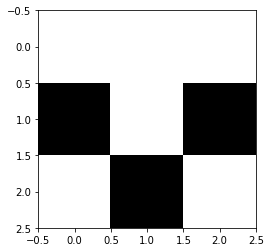

In [134]:
bad_x = np.array([[POS,POS,POS],[NEG,POS,NEG],[POS,NEG,POS]])
plt.imshow(bad_x,cmap=cmap);
plt.show()

In [135]:
pred = predict(bad_x)
index = np.argmax(pred)
print(classes[index])

X


#### 1.6.4.2 A bad '/'

**a. missing top right**

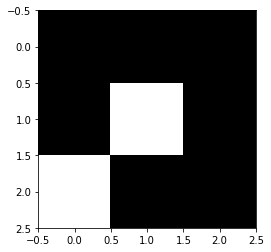

In [138]:
bad_forward_slash = np.array([[NEG,NEG,NEG],[NEG,POS,NEG],[POS,NEG,NEG]])
plt.imshow(bad_forward_slash,cmap=cmap);
plt.show()

In [139]:
pred = predict(bad_forward_slash)
index = np.argmax(pred)
print(pred)
print(classes[index])

[2, -2, 6, 2]
Forward


**b. missing middle**

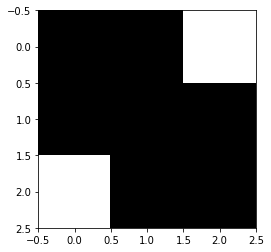

In [147]:
bad_forward_slash_b = np.array([[NEG,NEG,POS],[NEG,NEG,NEG],[POS,NEG,NEG]])
plt.imshow(bad_forward_slash_b,cmap=cmap);
plt.show()

In [148]:
pred = predict(bad_forward_slash_b)
index = np.argmax(pred)
print(pred)
print(classes[index])

[0, 0, 4, 4]
Forward


**c. a misfortune**

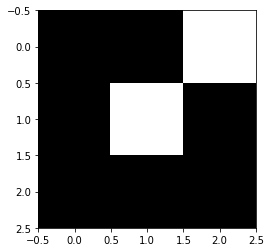

In [151]:
bad_forward_slash_b = np.array([[NEG,NEG,POS],[NEG,POS,NEG],[NEG,NEG,NEG]])
plt.imshow(bad_forward_slash_b,cmap=cmap);
plt.show()

#### 1.3.4 Simplifying 'o' (Forward Filter)

In [ ]:
pool = convulation_layer(forward_slash_filter,o)
pool = pool.reshape(2,2)
print(pool)
plt.imshow(pool,cmap=cmap);
plt.show()

#### 1.3.5 Simplifying 'o' (Backward Filter)

In [ ]:
filterd_image = convulation_layer(backward_slash_filter,o)
filterd_image = pool.reshape(2,2)
print(filterd_image)
plt.imshow(filterd_image,cmap=cmap);
plt.show()